# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [1]:
# your code here


We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
# your code here


Set batch size bs to be 64

In [14]:
# your code here


## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

Look for help on function untar_data

In [3]:
# your code here


Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None)
    Download `url` if doesn't exist to `fname` and un-tgz to folder `dest`



Take a look at the url where we can download the pets dataset

In [4]:
# your code here


'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

Set path for the Pets dataset
Download and decompress Pets

In [5]:
# your code here


PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet')

PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet')

List the elements in the path directory

In [ ]:
# your code here


[PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/annotations')]

Create sub-directory paths "path_anno" and "path_img" using annotations and images sub-directories.

In [ ]:
# your code here


/home/xufei/.fastai/data/oxford-iiit-pet/annotations
/home/xufei/.fastai/data/oxford-iiit-pet/images


The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

First get a list of file paths "fnames" from path_img, and show the first 5 elements

In [9]:
# your code here


[PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/Birman_125.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/Bombay_60.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/British_Shorthair_165.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/great_pyrenees_65.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/keeshond_4.jpg')]

[PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/Birman_125.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/Bombay_60.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/British_Shorthair_165.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/great_pyrenees_65.jpg'),
 PosixPath('/home/xufei/.fastai/data/oxford-iiit-pet/images/keeshond_4.jpg')]

extract labels from names using the method from_name_re from the ImageDataBunch class

set numpy seed 2 for randomization.

create a regex patthern to match all names ending with .jpg, excluding any repeats of / in the name while including _ and any repeats of number after _


In [10]:
# your code here


Take a look at ImageDataBunch

In [13]:
# your code here


fastai.vision.data.ImageDataBunch

fastai.vision.data.ImageDataBunch

Create an image data object named "data" using the regex pattern created earlier from path_img, with image size 224x224 and transformation set to get_transforms()

Normalize "data" with imagenet_stats

In [15]:
# your code here


what is imagenet_stats?

show a batch in "data", 3 rows and figure size of 7x6

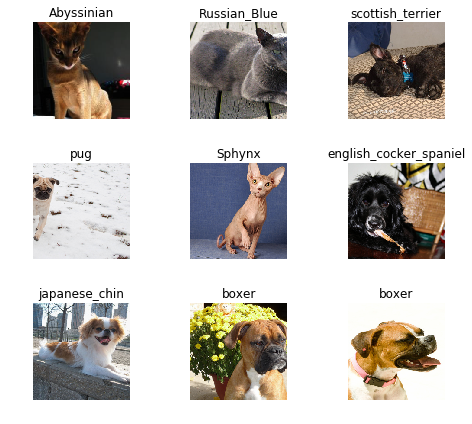

In [18]:
#your code here


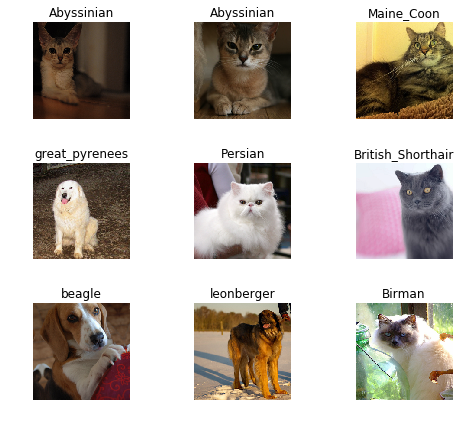

Take a look at all data classes and the total number of classes

In [20]:
# your code here


['Birman', 'Bombay', 'British_Shorthair', 'great_pyrenees', 'keeshond', 'Abyssinian', 'Bengal', 'shiba_inu', 'boxer', 'japanese_chin', 'saint_bernard', 'chihuahua', 'english_cocker_spaniel', 'newfoundland', 'Siamese', 'scottish_terrier', 'havanese', 'german_shorthaired', 'basset_hound', 'samoyed', 'Sphynx', 'Egyptian_Mau', 'english_setter', 'beagle', 'Russian_Blue', 'leonberger', 'pomeranian', 'Maine_Coon', 'Persian', 'american_bulldog', 'american_pit_bull_terrier', 'staffordshire_bull_terrier', 'wheaten_terrier', 'pug', 'Ragdoll', 'miniature_pinscher', 'yorkshire_terrier']
37


['Birman', 'Bombay', 'British_Shorthair', 'great_pyrenees', 'keeshond', 'Abyssinian', 'Bengal', 'shiba_inu', 'boxer', 'japanese_chin', 'saint_bernard', 'chihuahua', 'english_cocker_spaniel', 'newfoundland', 'Siamese', 'scottish_terrier', 'havanese', 'german_shorthaired', 'basset_hound', 'samoyed', 'Sphynx', 'Egyptian_Mau', 'english_setter', 'beagle', 'Russian_Blue', 'leonberger', 'pomeranian', 'Maine_Coon', 'Persian', 'american_bulldog', 'american_pit_bull_terrier', 'staffordshire_bull_terrier', 'wheaten_terrier', 'pug', 'Ragdoll', 'miniature_pinscher', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).

We will train for 5 epochs (5 cycles through all our data).

Create convnet style learners using "data" as data and resnet34 as the architecture, error_rate as metrics

In [21]:
# your code here


Train the learner using the one cycle policy with 4 epochs

In [22]:
# your code here


Total time: 02:28
epoch  train_loss  valid_loss  error_rate
1      1.183097    0.292663    0.091816    (00:50)
2      0.520304    0.248155    0.085163    (00:32)
3      0.324370    0.197760    0.063872    (00:32)
4      0.238492    0.186742    0.060546    (00:32)



Total time: 02:12
epoch  train loss  valid loss  error_rate
1      1.170103    0.291890    0.085163    (00:34)
2      0.519811    0.240403    0.082502    (00:32)
3      0.323481    0.204038    0.064538    (00:32)
4      0.238240    0.186547    0.067864    (00:32)



Save learner with name stage-1

In [ ]:
# your code here

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

looks at what comes out!

Create the classification interpretation object interp

In [ ]:
# your code here

Show inaccurate results using the interpretation object

In [ ]:
# your code here

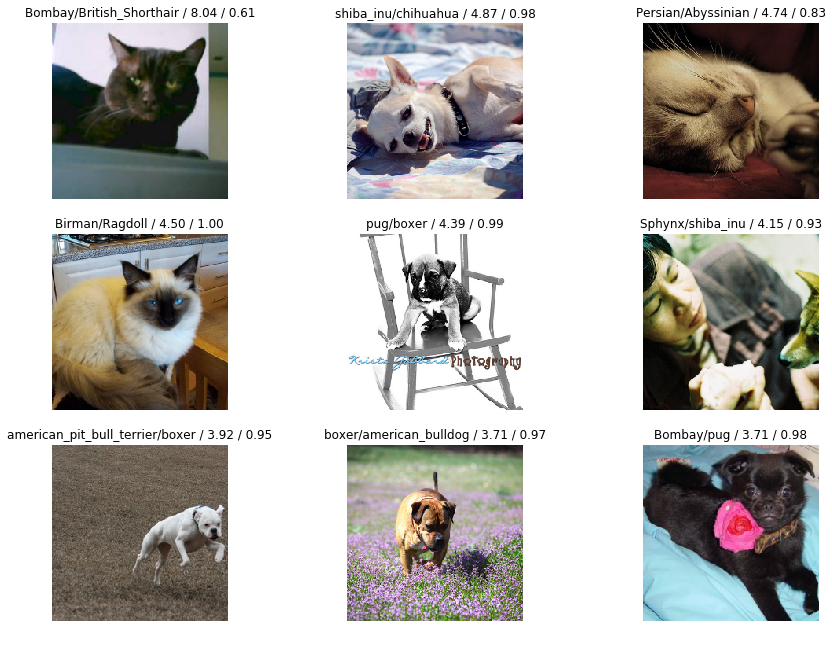

take a look at the doc of the method used

Show all possible combinations of predicted vs real results

In [ ]:
# your code here

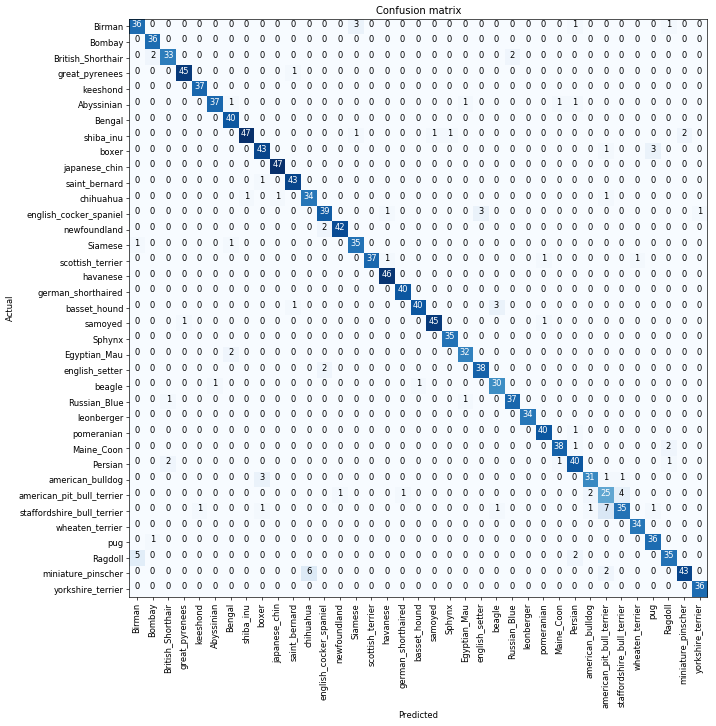

show most inaccurate results instead of all combinations

In [ ]:
# your code here

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('miniature_pinscher', 'chihuahua', 6),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Birman', 'Siamese', 3),
 ('boxer', 'pug', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('basset_hound', 'beagle', 3),
 ('american_bulldog', 'boxer', 3)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

What does unfreeze mean and what does it do?

In [ ]:
# your code here

Train the model after unfreeze with 1 epoch and take a look at the results

In [ ]:
# your code here

Total time: 00:32
epoch  train loss  valid loss  error_rate
1      0.260118    0.191770    0.058550    (00:32)



Loading the previously saved weights

In [ ]:
# your code here

Use the learning rate finder to find the optimal learning rate

In [ ]:
# your code here

Plot the learning rate

In [ ]:
# your code here

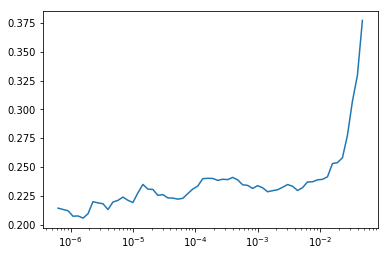

Unfreeze again and train with highest and lowest learning rates for different layers. 
Try 2 epochs

In [ ]:
# your code here

Total time: 00:42
epoch  train loss  valid loss  error_rate
1      0.200614    0.176755    0.057219    (00:21)
2      0.197669    0.169028    0.053892    (00:20)



That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

Get image data by creating the data object, then normalize it

In [ ]:
# your code here

Use resnet50 as the arch and data as the data, error rate as the metric

In [ ]:
# your code here

Train 5 epochs using one cycle again

In [ ]:
# your code here

Total time: 04:23
epoch  train loss  valid loss  error_rate
0      0.624318    0.215355    0.072512    (01:00)
1      0.355879    0.235637    0.077126    (00:50)
2      0.253141    0.189441    0.056032    (00:50)
3      0.172204    0.142786    0.052076    (00:50)
4      0.118077    0.132798    0.043507    (00:51)



Save the weights

In [ ]:
# your code here

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

unfreeze first then try with max and min learning rates for diff layers, 1 epoch

In [ ]:
# your code here

Total time: 01:16
epoch  train loss  valid loss  error_rate
1      0.099166    0.137234    0.047462    (01:16)



In this case it doesn't, so let's go back to our previous model.

Load the previously saved weights

In [ ]:
# your code here

Use the interp object to see the lease accurate results

In [ ]:
# your code here

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Ragdoll', 'Birman', 6),
 ('Birman', 'Ragdoll', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3)]

## Other data formats

Data are often saved in a variety of formats and naming conventions, so let's explore
the tools available to load data using the fastai library

Try setting the MNIST_SAMPLE dataset path using the method from the beginning of the lecture

In [ ]:
# your code here

PosixPath('/home/jhoward/.fastai/data/mnist_sample')

Create the imagedatabunch object using the ImageNet convention.

Don't do flip in transformation, and get data with size 26x26

In [ ]:
# your code here

show the data in 3 rows and 3 cols, figure size 5x5

In [ ]:
# your code here

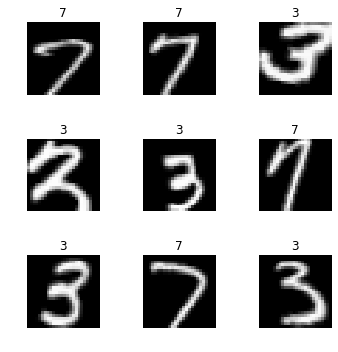

Try create a model using resnet18 and use accuracy as the metric
train 2 epochs

In [ ]:
# your code here

Total time: 00:11
epoch  train loss  valid loss  accuracy
1      0.108823    0.025363    0.991168  (00:05)
2      0.061547    0.020443    0.994112  (00:05)



If you have data files look like the following

path\
  train\
  test\
  labels.csv

In [17]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


Create imagedatabunch using a different method, size 28x28

In [ ]:
# your code here

Show samples in 3x3 table, figure size 5x5
Get the total data class list

In [ ]:
# your code here

[0, 1]

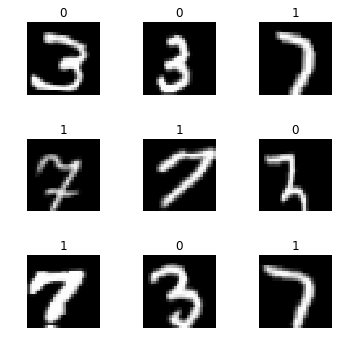

You can also create imagedatabunch directly from the dataframe

Show all the classes

In [ ]:
# your code here

[0, 1]

In [22]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/jhoward/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/jhoward/.fastai/data/mnist_sample/train/3/21102.png')]

In [23]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [25]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [27]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [28]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']